# Random Forest Classifier

In [31]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

data = pd.read_csv('heart_disease_by_ceo.csv', index_col=0)

x = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8804347826086957


## Visualizing the Data

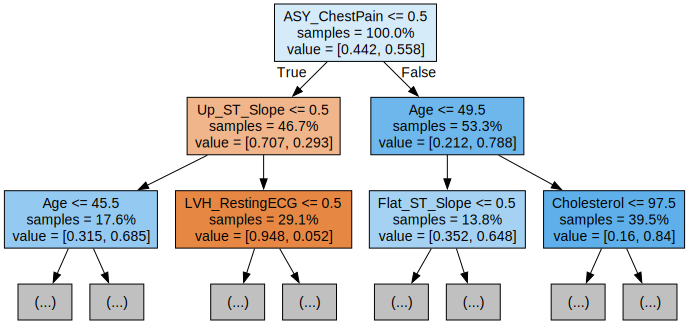

In [32]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,feature_names=x.columns, filled=True, max_depth=2, impurity=False, proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

In [33]:
param_dist = {'n_estimators' : randint(5,500), 'max_depth': randint(1, 20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, param_dist, cv=5, n_iter=5)
rand_search.fit(x_train, y_train)
best_rf = rand_search.best_estimator_
print("Best hyperamaeters: ", rand_search.best_params_)

Best hyperamaeters:  {'max_depth': 4, 'n_estimators': 329}


Accuracy: 0.8478260869565217
Precision: 0.8818181818181818
Recall: 0.8660714285714286


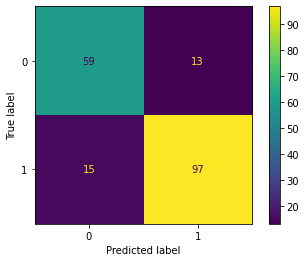

In [34]:
y_pred = best_rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

In [35]:
def tester_patient(liste_colonne, patient):
    df = pd.DataFrame(patient, columns=liste_colonne)
    prediction = best_rf.predict(df)
    if prediction == 1:
        print("Le patient est malade")
    else:
        print("Le patient est en bonne santé")

def tester_plusieurs_patients(liste_colonne, patients):
    index = 1
    for patient in patients:
        print(f"Patient {index}")
        tester_patient(liste_colonne, patient)
        print("\n")
        index += 1

In [36]:
#test 

liste_colonnes = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 
                  'MaxHR', 'ExerciseAngina', 'Oldpeak', 'TA_ChestPain', 
                  'ATA_ChestPain', 'NAP_ChestPain', 'ASY_ChestPain', 
                  'Normal_RestingECG', 'ST_RestingECG', 'LVH_RestingECG', 
                  'Up_ST_Slope', 'Flat_ST_Slope', 'Down_ST_Slope']


patient = [[40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1,0,0]] #1
patient2 = [[57,1,130,236,0,174,0,0.0,0,1,0,0,0,0,1,0,1,0]] #916
patient3 = [[57,0,130,131,0,115,1,1.2,0,0,0,1,1,0,0,0,1,0]] #915
patient4 = [[59,0,164,176,1,90,0,1.0,0,0,0,1,0,0,1,0,1,0]] #911

liste_patients = [patient, patient2, patient3, patient4]
tester_plusieurs_patients(liste_colonnes, liste_patients)



Patient 1
Le patient est en bonne santé


Patient 2
Le patient est en bonne santé


Patient 3
Le patient est malade


Patient 4
Le patient est malade


